# "Cross-validation" des modèles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm


## Creer des données synthetiques 

In [2]:
def get_data(
            N = 1500,
            p0 = 0.0,
            theta0 = 0,
            wt = np.pi/15,
            theta_std = np.pi/6):
    theta = np.random.randn(N)*theta_std
    a = (theta-theta0)/wt
    p = p0/2 + (1-p0)/(1+np.exp(-a))
    y = np.random.rand(N) < p 

    return theta, p, y



In [3]:
theta, p, y = get_data()


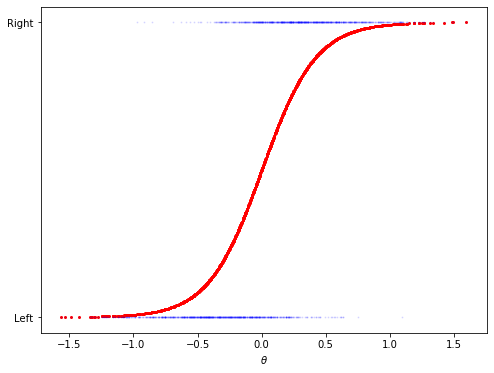

In [4]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);



# utilisons torch

https://blog.goodaudience.com/awesome-introduction-to-logistic-regression-in-pytorch-d13883ceaa90


In [5]:
import torch
torch.set_default_tensor_type('torch.DoubleTensor')
from torch.nn import functional as F

In [6]:

# Same as linear regression!
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)    
        
    def forward(self, x):
        # out = torch.sigmoid(self.linear(x))
        out = torch.sigmoid(self.linear(x))
        return out

logistic_model = LogisticRegressionModel()

In [7]:
logistic_model.linear.weight, logistic_model.linear.bias

(Parameter containing:
 tensor([[-0.8812]], requires_grad=True),
 Parameter containing:
 tensor([-0.2512], requires_grad=True))

https://pytorch.org/docs/stable/nn.html#bceloss

In [8]:
criterion = torch.nn.BCELoss()

learning_rate = 0.01
num_epochs = 1e4
optimizer = torch.optim.Adam(logistic_model.parameters(), lr=learning_rate)

In [9]:
labels = torch.Tensor(y[:, None])

In [10]:
y, labels

(array([ True, False, False, ..., False, False,  True]),
 tensor([[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [1.]]))

In [11]:
Theta = torch.Tensor(theta[:, None])

In [12]:
theta, Theta

(array([-0.03974758, -0.55205618, -0.33467928, ..., -0.33363011,
        -0.06249112,  0.18982132]),
 tensor([[-0.0397],
         [-0.5521],
         [-0.3347],
         ...,
         [-0.3336],
         [-0.0625],
         [ 0.1898]]))

In [13]:
# logistic_model(Theta)

In [14]:
iter = 0
for epoch in range(int(num_epochs)):
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward pass to get output/logits
    outputs = logistic_model(Theta)

    # Calculate Loss: 
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    iter += 1

    # Print Loss
    if epoch % 1000 == 0 : 
        print("Iteration: {}. Loss: {}.".format(epoch, loss.item()))

Iteration: 0. Loss: 0.8830601301178514.
Iteration: 1000. Loss: 0.3993466704980939.
Iteration: 2000. Loss: 0.39268522699158287.
Iteration: 3000. Loss: 0.3926184915011703.
Iteration: 4000. Loss: 0.39261845497571163.
Iteration: 5000. Loss: 0.39261845497562753.
Iteration: 6000. Loss: 0.3926184549756281.
Iteration: 7000. Loss: 0.39261845497562814.
Iteration: 8000. Loss: 0.39261845497562825.
Iteration: 9000. Loss: 0.3926184549756283.


In [15]:
logistic_model.eval()

LogisticRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

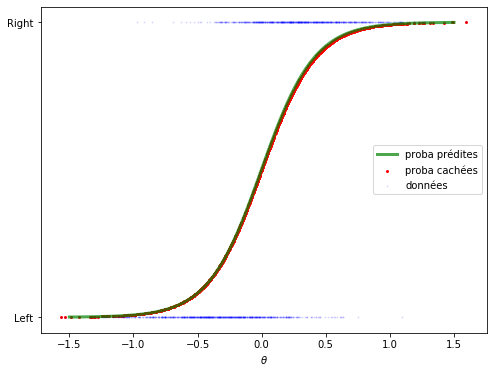

In [16]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r', label='proba cachées')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b', label='données')
x_values = np.linspace(-1.5, 1.50, 100)[:, None]
y_values = logistic_model(torch.Tensor(x_values)).detach().numpy()
plt.plot(x_values, y_values, 'g', alpha=.7, lw=3, label='proba prédites')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);
plt.legend()
